<a href="https://colab.research.google.com/github/merriekay/CS66_F24/blob/main/Day19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Improving Search
## Day19

### CS66: Introduction to Computer Science II | Fall 2024

Thursday, November 7th, 2024

### Helpful Resources:
[📜 Syllabus](https://docs.google.com/document/d/1lnkmnAm0tfw2ybqhS01ylSqKfkOcAAkmrrZUuDjwHuU/edit?usp=drive_link) | [📬 CodePost Login](https://codepost.io/login) | [📆 Schedule](https://docs.google.com/spreadsheets/d/1FW9s8S04zqpOaA13JyrlNPszk5D-H9dBi7xX6o5VpgY/edit?usp=drive_link) | [🙋‍♂️ PollEverywhere](https://pollev.com/moore) | [🪴 Office Hour Sign-Up](https://calendly.com/meredith-moore/office-hours)

# Announcements:

### You should be working on:
__Exam #2__  was due Tuesday November 5th. 

## References for this lecture

Problem Solving with Algorithms and Data Structures using Python

Sections 6.1-6.5 [https://runestone.academy/ns/books/published/pythonds/SortSearch/toctree.html](https://runestone.academy/ns/books/published/pythonds/SortSearch/toctree.html)



## Sequential Search

As long as you can iterate through items in a data structure, you can write a _sequential search_ or _linear search_ - a search that runs in $O(n)$ time.

We've been doing this all semester long: 1st week activity, _search_ in `OrderedList` class, etc.

* for each item in the data structure
    * check if the item is the one you're looking for

linear search of Python list

In [1]:
15 in [3,5,2,4,1]

False

In [2]:
def sequentialSearch(alist, item):
    pos = 0
    found = False
    
    while pos < len(alist) and not found:
        if alist[pos] == item:
            found = True
        else:
            pos = pos+1
    return found

testlist = [1, 2, 32, 8, 17, 19, 42, 13, 0]
print(sequentialSearch(testlist, 3))
print(sequentialSearch(testlist, 13))

False
True


If the item is actually in the list
* best case: 1 comparison
* worst case: $n$ comparison
* average case: $\frac{n}{2}$ comparisons

If the item is _not_ actually in the list
* best case: $n$ comparison
* worst case: $n$ comparison
* average case: $n$ comparisons

## Group Activity Problem 1

If we knew that the list was in sorted order is it possible to make the sequential search end early? How?

In [3]:
testlist = [0, 1, 2, 8, 13, 17, 19, 32, 42]
print(sequentialSearch(testlist, 3))
print(sequentialSearch(testlist, 13))

False
True


## Strategy for Guess-My-Number Game

![clockgame.jpg](clockgame.jpg)

[[video](https://youtu.be/UnAWprsqu5Q)]
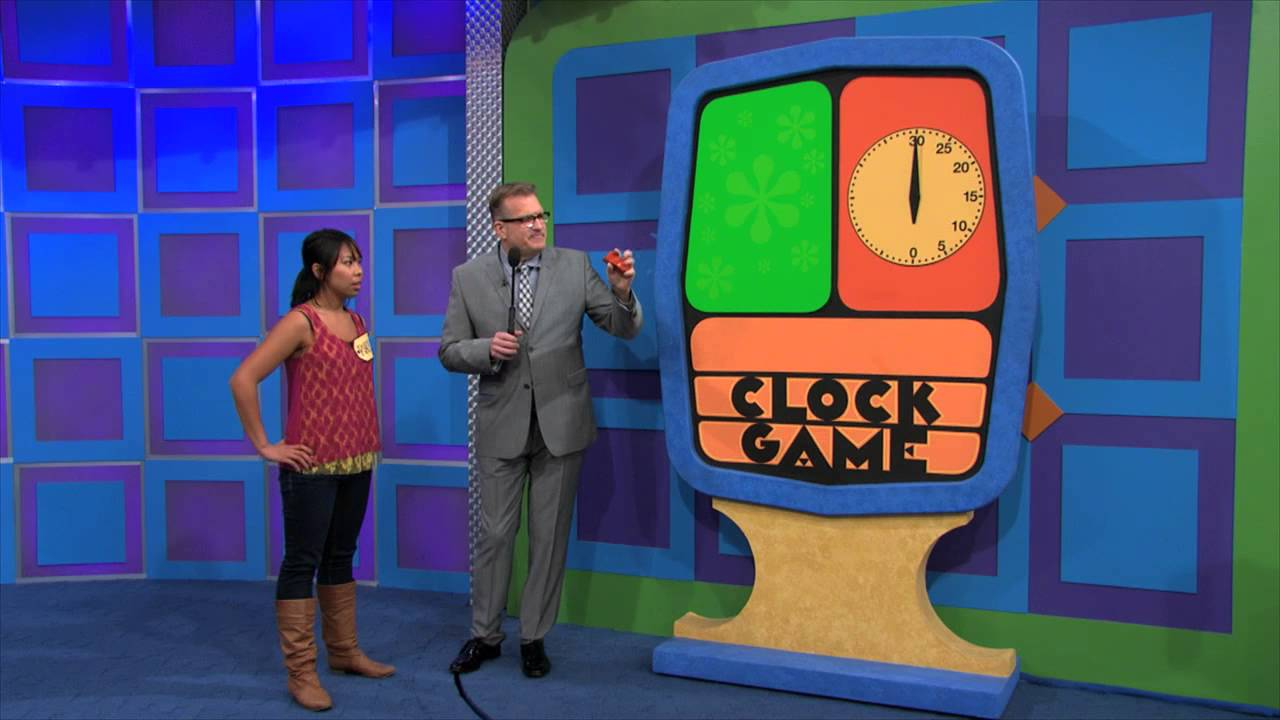

Image credit: https://www.buzzerblog.com/2014/09/23/watch-the-price-is-right-revamps-clock-game/

## Binary Search

__Binary Search__ works by looking at the middle item within a given range and throwing out at least half the items on each iteration.

_only works on a sorted data structure_

Let's draw some pictures on the board to see how this works.

In [4]:
def binarySearch(alist, item):
    first = 0
    last = len(alist)-1
    found = False

    while first<=last and not found:
        midpoint = (first + last)//2
        if alist[midpoint] == item:
            found = True
        else:
            if item < alist[midpoint]:
                last = midpoint-1
            else:
                first = midpoint+1

    return found

testlist = [0, 1, 2, 8, 13, 17, 19, 32, 42,]
print(binarySearch(testlist, 3))
print(binarySearch(testlist, 13))

False
True


## Group Activity Problem 2:

Write down how many items you have to look at _in the worst case_ for lists of the following size:
* 100
* 200
* 400
* 1000
* 10000

## Big-O analysis of Binary Search

Things to notice
* in each iteration, you can eliminate half the list
* you can double the number of items in a list and only need to check one extra item
* it does grow - so it isn't $O(1)$
* it's much less than $O(n)$

Binary Search is $O(\log n)$ - inverse of exponential growth

This is fantastic!

## The Ordered List Abstract Data Type

The book implemented the Ordered List Abstract Data Type as a Linked List: [https://runestone.academy/ns/books/published/pythonds/BasicDS/ImplementinganOrderedList.html](https://runestone.academy/ns/books/published/pythonds/BasicDS/ImplementinganOrderedList.html)

* Search was $O(n)$


If we instead implement Ordered List as an Array (Python list)
* Search is $O(\log n)$
* Both `add` and `remove` still $O(n)$ because items are shifted (but finding the spot is a *search*

## O(1) search

Sequential Search is $O(n)$

Binary Search is $O(\log n)$

Is it possible to do search in $O(1)$ time?


#### An Idea

Let's say we have a collection of values to store like 1, 5, 6, 7, 9, 10, 13, 15, 18.

We could represent this in a list like this:

In [5]:
my_collection = [None,1,None,None,None,5,6,7,None,9,10,None,None,13,None,15,None,None,18,None]

Now, we can search if a value is in the collection by looking it up at its index. If it is not in the collection, `None` will be returned.

In [6]:
print( my_collection[5] )
print( my_collection[18] )
print( my_collection[4] )
print( my_collection[17] )

5
18
None
None


## Group Activity Problem 3:

Because list access is $O(1)$, this does search in $O(1)$. So, are there downsides to this approach?


Could we make an `UnorderedList` this way? How about an `OrderedList`?

## Hash Tables

A __Hash Table__ is a collection of items which are stored in such a way as to make it easy to find them later.

Hash tables work like the above approach, except it allows for values outside of indices of the table using a __hash function__.

Hash functions can be any function that transforms a value into a suitable index for the list. 

For example:

In [7]:
hash_table_size = 10
hash_table = [None] * 10 #initialize all 10 spots to None

def simple_hash(value,num_items):
    return value % num_items

print(hash_table)

[None, None, None, None, None, None, None, None, None, None]


Now let's put a value into the hash table.

In [8]:
val = 87
val_hash = simple_hash(val,hash_table_size)
hash_table[val_hash] = val
print(hash_table)

[None, None, None, None, None, None, None, 87, None, None]


Doing a few more:

In [9]:
hash_table[simple_hash(33,hash_table_size)] = 33
hash_table[simple_hash(112,hash_table_size)] = 112
hash_table[simple_hash(19,hash_table_size)] = 19
print(hash_table)

[None, None, 112, 33, None, None, None, 87, None, 19]


Now we can search the hash table like this:

In [10]:
hash_table[simple_hash(33,hash_table_size)] == 33 #is 33 at the spot it should be in the hash table?

True

In [11]:
hash_table[simple_hash(12,hash_table_size)] == 12 #is 12 at the spot it should be in the hash table?

False

## Group Activity Problem 4

There's still a problem with this approach. What is it?

## Collisions

When two different items end up with the same hash value, it is called a __collision__.

This is a problem since both items can't occupy the same memory location.

__Collision Resolution__ is the process of finding a new location for an item when there is a collision - we'll talk about some approaches next time.


## Hash functions for strings

If you want to put strings in your hash table, you have to come up with a way to convert them into numbers. 

One approach is to use the `ord` function for each character, which returns the unicode value used to represent the character in memory.

In [12]:
ord('c')

99

In [13]:
ord('a')

97

In [14]:
ord('t')

116

In [15]:
def string_hash(astring, tablesize):
    sum = 0
    for pos in range(len(astring)):
        sum = sum + ord(astring[pos])

    return sum%tablesize

print( string_hash("cat",10) )
print( string_hash("dog",10) )
print( string_hash("chicken",10) )

2
4
5


## Up Next:

We'll talk more about hash tables and how to handle collisions.